## Multivariate Linear Regression

We will look at a multivariate linear relationship where we have two explanatory variables and an outcome variable.  We want to estimate the best fitting line for our data.  Again, we want to ask ourselves:  is x1 and x2 useful predictors for y?

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
df1 = pd.read_csv('diet.csv')
df1.head()

,diet,activity,health_score
0,15,11,10
1,150,79,96
2,55,39,37
3,52,33,35
4,4,1,4


In [3]:
df1.describe()

,diet,activity,health_score
count,50.000000,50.000000,50.000000
mean,78.040000,42.660000,51.220000
std,44.903507,24.668918,30.064753
min,0.000000,0.000000,0.000000
25%,42.000000,24.750000,28.000000
50%,78.000000,44.500000,46.000000
75%,115.750000,61.000000,77.750000
max,150.000000,84.000000,98.000000


We want to estimate a multivariate model that has two explanatory variables, namely number of hours of physical activity (ranges from 0 to 84) and number of servings of fruits and vegetables (ranges from 0 to 150). We want to know if these two variables are useful in predicting a person's health score (ranges from 0 to 100 with 0 being worst health and 100 being excellent health).  Number of hours of physical activity in a week consists of exercise, housework, physical activity on the job, walking, and etc. The diet variable reflects number of servings of fruits and vegetables in a week. All three variables are quantitative variables.

### Multivariate Linear Regression Model

Linear Regression Equation:    y_pred = b0 + b1x1 + b2x2

Null hypothesis H0:   no effect, b1=0, b2=0
    
Alternative hypothesis H1: effect exists, coefficients are not zero

b1 is not equal to 0

b2 is not equal to 0

In [4]:
# Multivariate Linear Regression
model = sm.OLS.from_formula("health_score ~ activity + diet", data=df1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           health_score   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     580.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           7.31e-34
Time:                        10:58:47   Log-Likelihood:                -159.44
No. Observations:                  50   AIC:                             324.9
Df Residuals:                      47   BIC:                             330.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0673      1.762     -0.606      0.548      -4.613       2.478
activity       0.8170      0.079     10.395      0.000       0.659       0.975
diet           0.2234      0.043      5.174      0.000       0.137       0.310
==============================================================================
Omnibus:                       13.781   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.217
Skew:                           0.862   Prob(JB):                     4.07e-05
Kurtosis:                       5.594   Cond. No.                         210.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretations  and Predictions

Adjusted R-Squared:  A measure of model fit.  It ranges from 0 ot 1 where 1 means a better fit. It's 0.96.

Constant Coefficient:  This is your y-intercept when your input variable coefficients for x1 and x2 are zero.  The expected output Y would be equal to the constant. Health score is 9.42 when both diet and activity are zero.

x1 Coefficient:  It is the change in the output Y for a change of one unit in the variable x1. For an hour increase in activity, there is a 0.82 change in health score.  

x2 Coefficient:  It is the change in the output Y for a change of one unit in the variable x2. For a unit change in diet, which reflects an increase of 1 serving of vegetables or fruit, there is a 0.22 change in health score.

Standard error:  It's a measure of the accuracy of the coefficients.  It tells you how far away the estimated slope is from the true population slope, on average.  The lower it is, then the higher level of accuracy. 

P-value:  When you have a p-value of less than 0.05, then it is considered to be statistically significant. Both p-values are 0.000, which is under the 0.05 threshold.  We can reject the null hypothesis if the p-values are less than 0.05 threshold, which is at the 95% confidence level.

Confidence Interval:  It's the range in which coefficients are likely to fall(with a likelihood of 95%). This is where the true population estimate is likely to fall, given normality.

Linear Regression Equation:    y_pred = b0 + b1x1 + b2x2

In [6]:
constant = -1.0673
b1 = 0.8170  # activity
b2 = 0.2234  # diet

In [7]:
# Predict health score, given activity = 40 and diet = 75
y_pred1 = constant + b1*(40) + b2*(75)
y_pred1

48.3677

In [8]:
y_pred2 = constant + b1*(20) + b2*(36)
y_pred2

23.3151

In [9]:
y_pred3 = constant + b1*(80) + b2*(150)
y_pred3

97.80269999999999

### Residuals

The residual errors are the difference between the observed y and the predicted y values.  It is the vertical distance from the data point to the regression line. Your errors should be random and normally distributed around zero.  Errors should have constant variance such that it is not related to your x variable.

Text(0, 0.5, 'Residuals')

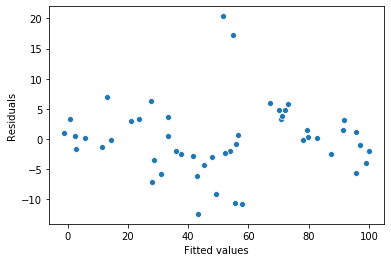

In [11]:
# Let's take a look at the residual values againsted the predicted values
# plot of residuals on fitted values 
import seaborn as sns
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
pp.set_ylabel("Residuals")

In [12]:
result.resid.mean()

-1.7834622667578513e-14

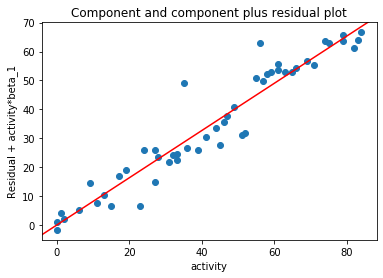

In [13]:
# Partial residual plot, holding one variable constant
# How is activity and health score related, holding diet constant?

from statsmodels.graphics.regressionplots import plot_ccpr
import matplotlib.pyplot as plot
ax = plot.axes()
plot_ccpr(result, "activity", ax)
ax.lines[1].set_color('red')

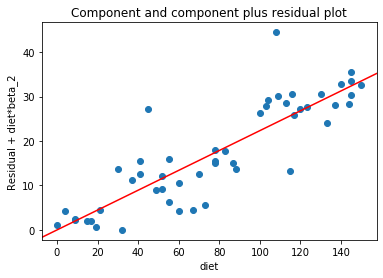

In [14]:
# Partial residual plot, holding one variable constant
# How is diet and health score related, holding activity constant?
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import plot_ccpr
import matplotlib.pyplot as plot

ax = plot.axes()
plot_ccpr(result, "diet", ax)
ax.lines[1].set_color('red')

The inference drawn is that both activity and diet are statistically significant in predicting health score.  The relationship for both variables are positive, though the size of the coefficient effects are small, 0.82 and 0.22.  Overall, the model explains 0.96 of the variation. The results are statistically significant, despite small effect sizes.

In [ ]:
# end